# Exploration of the PTBDB-Database

### **Loading the Data and first Exploration**

In [2]:
# Load packages and Data

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

ptbdb_abnormal_df = pd.read_csv("ptbdb_abnormal.csv")
ptbdb_normal_df = pd.read_csv("ptbdb_normal.csv")

In [3]:
# PTBDB Normal; Basic Statistic and Exploration

new_column_names = range(1, len(ptbdb_normal_df.columns) + 1)
ptbdb_normal_df.columns = new_column_names
#ptbdb_normal_df.head()
ptbdb_normal_df[188].describe()

count    4045.0
mean        0.0
std         0.0
min         0.0
25%         0.0
50%         0.0
75%         0.0
max         0.0
Name: 188, dtype: float64

In [4]:
# PTBDB Abnormal; Basic Statistic and Exploration

new_column_names = range(1, len(ptbdb_abnormal_df.columns) + 1)
ptbdb_abnormal_df.columns = new_column_names
#ptbdb_abnormal_df.head()
ptbdb_abnormal_df[188].describe()
#ptbdb_abnormal_df.isna().sum().sum()

count    10505.0
mean         1.0
std          0.0
min          1.0
25%          1.0
50%          1.0
75%          1.0
max          1.0
Name: 188, dtype: float64

In [5]:
# Combining the two Dataframes 
ptbdb_comb_df = pd.concat([ptbdb_normal_df, ptbdb_abnormal_df], ignore_index=True)

# Transforming the Target Variable to Integer
ptbdb_comb_df[188]=ptbdb_comb_df[188].astype(int)

# Data Exploration
ptbdb_comb_df.describe()
# ptbdb_comb_df[1].value_counts()
#ptbdb_comb_df.isna().sum().sum()
ptbdb_comb_df.shape
#ptbdb_comb_df[188].value_counts()

(14550, 188)

In [6]:
# Verification that all Values are between 0 and 1
print(ptbdb_comb_df.max().max())
print(ptbdb_comb_df.min().min())

1.0
0.0


### **First Visualization**

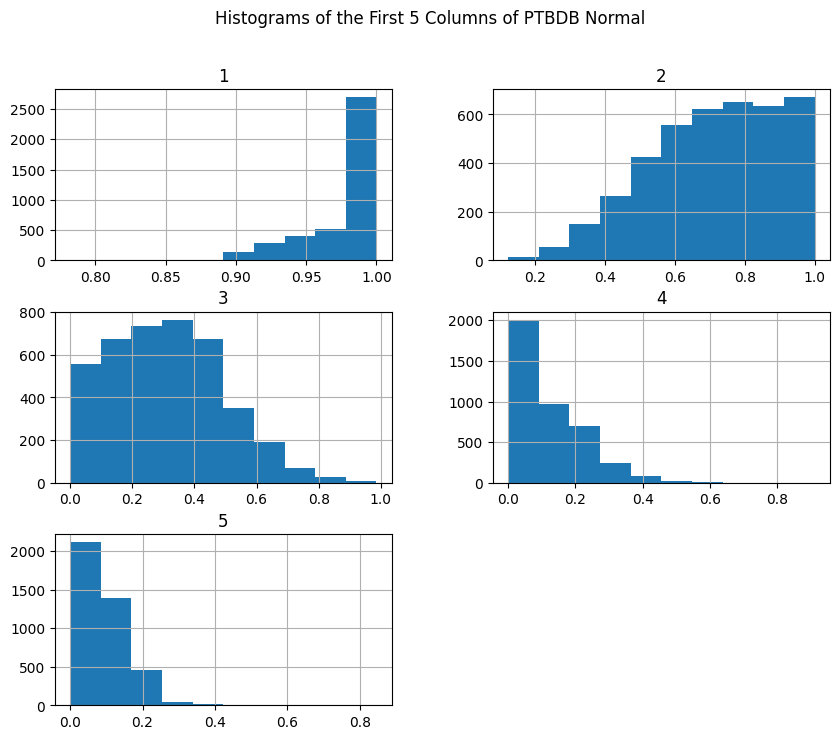

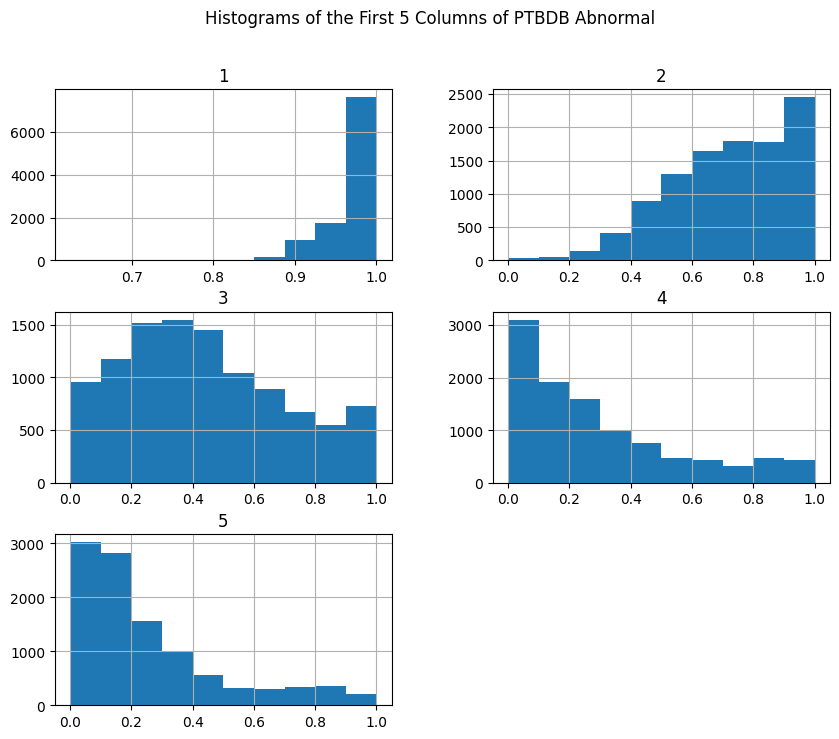

In [7]:
# Histograms of the first Columns

ptbdb_normal_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of PTBDB Normal')
plt.show()
ptbdb_abnormal_df.iloc[:, :5].hist(figsize=(10, 8))
plt.suptitle('Histograms of the First 5 Columns of PTBDB Abnormal')
plt.show()

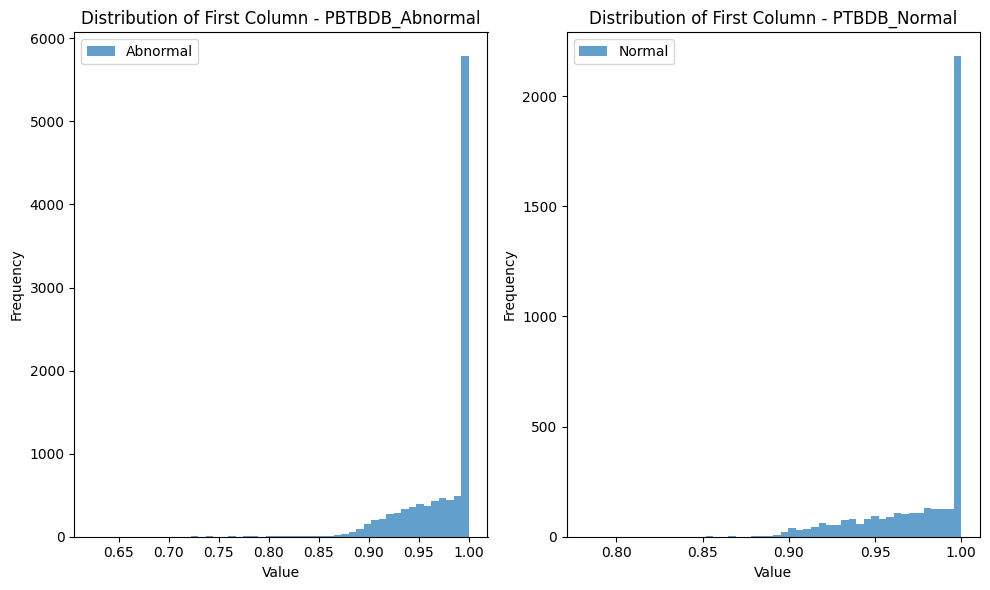

In [8]:
# Distribution of the first Column - Seperated by the Target Variable

plt.figure(figsize=(10, 6))

plt.subplot(1, 2, 1)
plt.hist(ptbdb_abnormal_df.iloc[:, 0], bins=50, alpha=0.7, label='Abnormal')
plt.title('Distribution of First Column - PBTBDB_Abnormal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.subplot(1, 2, 2)
plt.hist(ptbdb_normal_df.iloc[:, 0], bins=50, alpha=0.7, label='Normal')
plt.title('Distribution of First Column - PTBDB_Normal')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.legend()

plt.tight_layout()
plt.show()

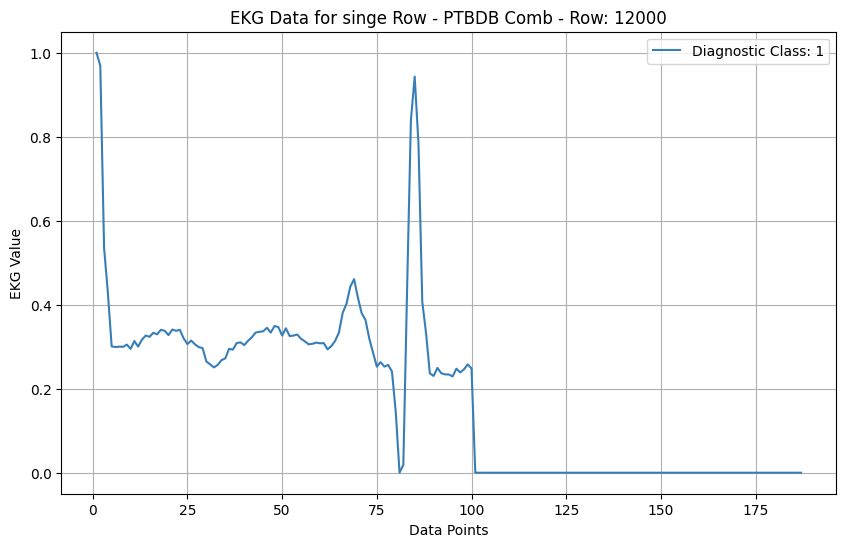

In [9]:
# Grafic Representation of raw Data (Single preprocessed EKG-Signal) - PTBDB Comb

#Choose Row to display: 
row_to_display = 12000

plt.figure(figsize=(10, 6))
plt.plot(range(1, 188), ptbdb_comb_df.iloc[row_to_display, :187], 
         label= f"Diagnostic Class: {ptbdb_comb_df.iloc[row_to_display, 187]}" , color='#377eb8')
plt.xlabel('Data Points')
plt.ylabel('EKG Value')
plt.title(f'EKG Data for singe Row - PTBDB Comb - Row: {row_to_display}')
plt.legend()
plt.grid(True)
plt.show();

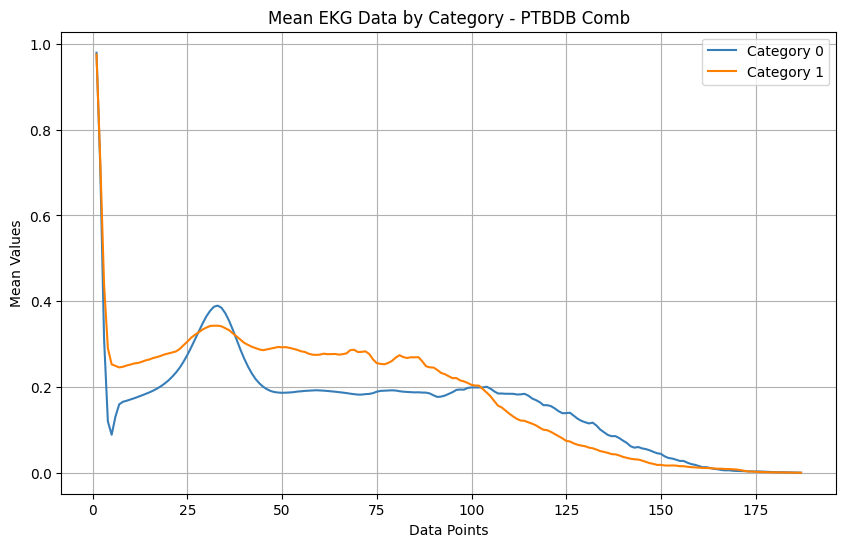

In [10]:
# Grafic representation of the Categories - ptbdb_comb

# Group by the category in the column named '188'
grouped = ptbdb_comb_df.groupby(188)
# Calculate the mean for each category across the 187 columns
means = grouped.mean()
colors = ['#377eb8', '#ff7f00', '#4daf4a', '#f781bf', '#a65628']
# Plot the means for each category
plt.figure(figsize=(10, 6))
for i, category in enumerate(means.index):
    plt.plot(range(1, 188), means.loc[category], label=f'Category {category}', color=colors[i])
plt.xlabel('Data Points')
plt.ylabel('Mean Values')
plt.title('Mean EKG Data by Category - PTBDB Comb')
plt.legend()
plt.grid(True)
plt.show()

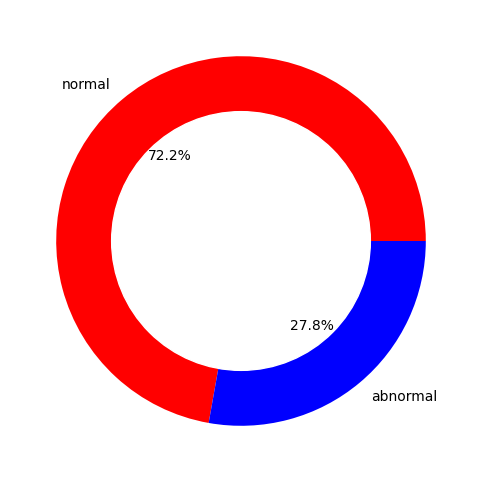

In [11]:
# Distribution of Classes in PTBDB - Comb

equilibre=ptbdb_comb_df[188].value_counts()
# equilibre.head()

plt.figure(figsize=(12,6))
my_circle=plt.Circle( (0,0), 0.7, color='white')
plt.pie(equilibre, labels=["normal", "abnormal"], 
        colors=['red','blue'],autopct='%1.1f%%')
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show();

### **First Statistical Evaluation**

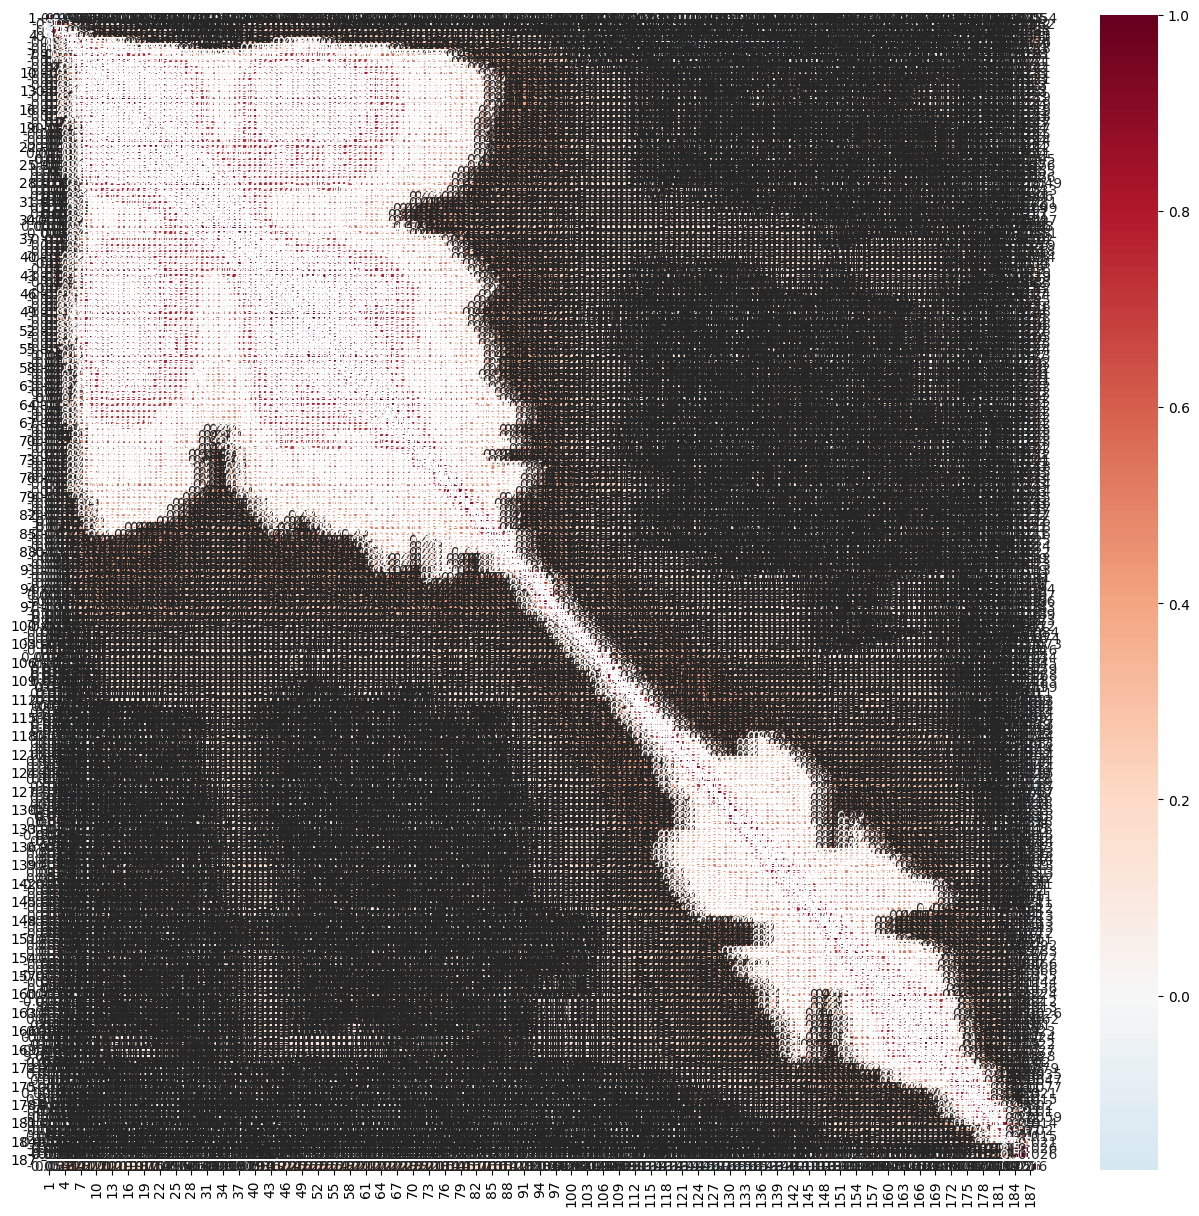

In [12]:
# Pearson Correlation

# plt.figure(figsize=(16,15))
# sns.heatmap(ptbdb_comb_df.corr(),  annot=True, cmap="RdBu_r", center =0);

# Does this already qualify as modern art?

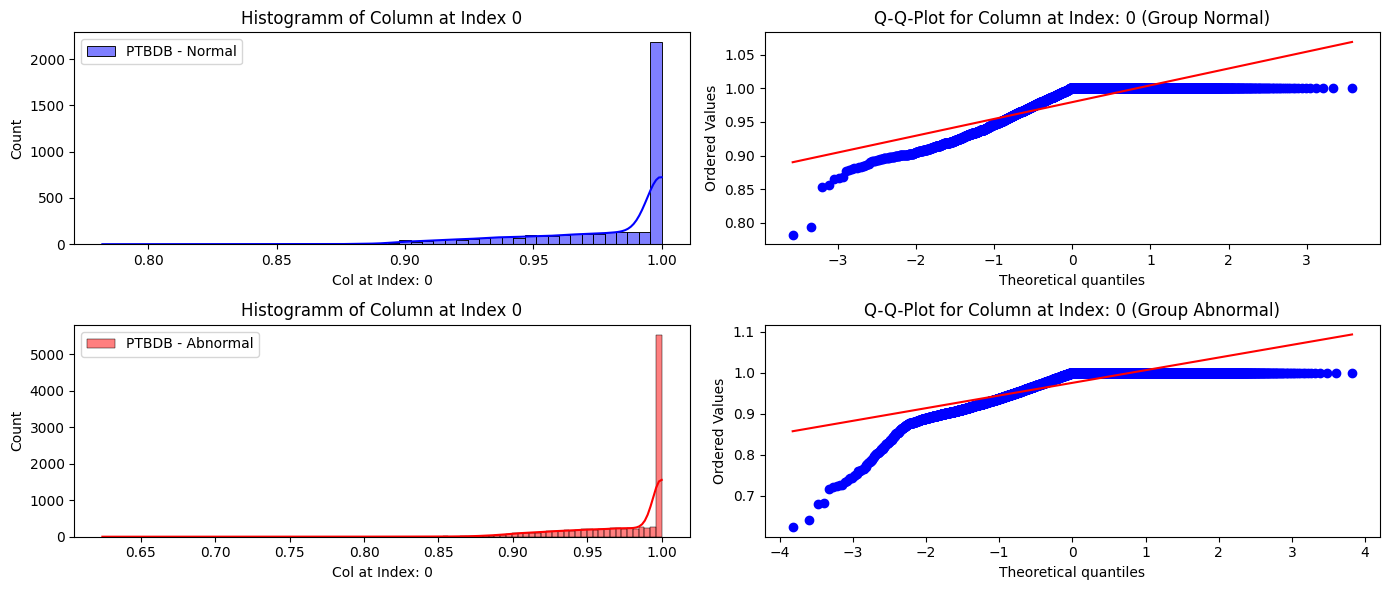

In [13]:
# Normal-Distribution of the explainatory variables? - Visual

# Choose Column to Check: 
column = 0

X = ptbdb_comb_df.iloc[:, :-1]  
y = ptbdb_comb_df.iloc[:, -1]   
normal = X[y == 0]
abnormal = X[y == 1]

plt.figure(figsize=(14, 6))

plt.subplot(2, 2, 1)
sns.histplot(normal.iloc[:, column], kde=True, color='blue', label='PTBDB - Normal')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at Index {column}')

plt.subplot(2, 2, 2)
stats.probplot(normal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot for Column at Index: {column} (Group Normal)')

plt.subplot(2, 2, 3)
sns.histplot(abnormal.iloc[:, column], kde=True, color='red', label='PTBDB - Abnormal')
plt.xlabel(f"Col at Index: {column}")
plt.legend()
plt.title(f'Histogramm of Column at Index {column}')

plt.subplot(2, 2, 4)
stats.probplot(abnormal.iloc[:, column], dist="norm", plot=plt)
plt.title(f'Q-Q-Plot for Column at Index: {column} (Group Abnormal)')

plt.tight_layout()
plt.show()

In [14]:
# Check for normal Distribution with Shapiro-Wilk-Test: 

# Choose Column to Check: 
column = 10

def check_normality(data, alpha=0.05):
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    if p > alpha:
        return True  # Data is normal ditributed
    else:
        return False # Date ist not normal distributed 

# Überprüfung der Normalverteilung für die erste Spalte (kann für andere Spalten wiederholt werden)
is_normal_normal_group = check_normality(normal.iloc[:, column])
is_normal_abnormal_group = check_normality(abnormal.iloc[:, column])

print(f'Normal distribution for column {column} in normal group: {is_normal_normal_group}')
print(f'Normal distribution for column {column} in abnormal group: {is_normal_abnormal_group}')

Normal distribution for column 10 in normal group: False
Normal distribution for column 10 in abnormal group: False


In [15]:
# Check for normal Distribution with Shapiro-Wilk-Test (over all Columns)

def check_normality(data, alpha=0.05):
    stat, p = stats.kstest(data, 'norm', args=(data.mean(), data.std()))
    return p > alpha, stat, p

normality_results = []
for column in X.columns:
    is_normal_normal_group, stat_normal, p_normal = check_normality(normal[column])
    is_normalabnormal_group, stat_abnormal, p_abnormal = check_normality(abnormal[column])
    normality_results.append({
        'Variable': column,
        'is_normal_normal_group': is_normal_normal_group,
        'ks_stat_normal': stat_normal,
        'p_val_normal': p_normal,
        'is_normal_abnormal_group': is_normal_abnormal_group,
        'ks_stat_abnormal': stat_abnormal,
        'p_val_abnormal': p_abnormal
    })

results_df = pd.DataFrame(normality_results)

# Sort results if needed: 
# sorted_results_df = results_df.sort_values(by='p_val_normal')

# Data filtering to identify variables:
filtered_results_df = results_df[
    (results_df['is_normal_normal_group'] == True) &
    (results_df['is_normal_abnormal_group'] == True)]

results_df.head()
filtered_results_df.info()

# None of the explanatory variables is normal distributed. 

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Variable                  0 non-null      int64  
 1   is_normal_normal_group    0 non-null      bool   
 2   ks_stat_normal            0 non-null      float64
 3   p_val_normal              0 non-null      float64
 4   is_normal_abnormal_group  0 non-null      bool   
 5   ks_stat_abnormal          0 non-null      float64
 6   p_val_abnormal            0 non-null      float64
dtypes: bool(2), float64(4), int64(1)
memory usage: 0.0 bytes


c:\Users\maxgl\heartbeat_dst\myenv\lib\site-packages\scipy\stats\_distn_infrastructure.py:2071: RuntimeWarning: invalid value encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


In [16]:
# Test for normal distribution with D'Agostino and Pearson's Normality Test

from scipy.stats import normaltest

def check_normality(data, alpha=0.05):
    stat, p = normaltest(data)
    return p > alpha, stat, p

normality_results = []
for column in X.columns:
    is_normal_normal_group, stat_normal, p_normal = check_normality(normal[column])
    is_normal_abnormal_group, stat_abnormal, p_abnormal = check_normality(abnormal[column])
    normality_results.append({
        'Variable': column,
        'is_normal_normal_group': is_normal_normal_group,
        'dagostino_stat_normal': stat_normal,
        'p_val_normal': p_normal,
        'is_normal_abnormal_group': is_normal_abnormal_group,
        'dagostino_stat_abnormal': stat_abnormal,
        'p_val_abnormal': p_abnormal
    })

results_df = pd.DataFrame(normality_results)

# Sort results if needed:
# sorted_results_df = results_df.sort_values(by='p_val_normal')

# Data filtering to identify variables:
filtered_results_df = results_df[
    (results_df['is_normal_normal_group'] == True) &
    (results_df['is_normal_abnormal_group'] == True)]

results_df.head(100)
#filtered_results_df.info()

,Variable,is_normal_normal_group,dagostino_stat_normal,p_val_normal,is_normal_abnormal_group,dagostino_stat_abnormal,p_val_abnormal
0,1,False,955.791579,2.834626e-208,False,4641.338358,0.000000e+00
1,2,False,214.789211,2.286207e-47,False,455.472693,1.245551e-99
2,3,False,108.396712,2.897030e-24,False,866.249734,7.875177e-189
3,4,False,1013.764014,7.310405e-221,False,1263.562300,4.177658e-275
4,5,False,1785.686661,0.000000e+00,False,2074.014022,0.000000e+00
...,...,...,...,...,...,...,...
95,96,False,1782.489221,0.000000e+00,False,1946.678297,0.000000e+00
96,97,False,1624.038588,0.000000e+00,False,2008.654889,0.000000e+00
97,98,False,1632.849080,0.000000e+00,False,2046.933617,0.000000e+00
98,99,False,1656.477298,0.000000e+00,False,2073.761836,0.000000e+00


### **First Conclusions**
- 14550 Entries; Normal: 4045 (27,8%); Abnormal: 10505
- There are no missing values
- The values of all explanatory variables are normalized continous variables with values between 0 and 1
- The target variable is a nominal categorical variable with a value of 0 or 1
- None of the explanatory variables is normal distributed (Shapiro-Wilk-Test)

### **Challenges**
- There is a potential distortion from cropping, (downsampling) and padding with zeros
- The QRS-Complexes are not centered
- peak at Column 1-3; 
- A further challenge is that the distinction between pathologies is only possible when using the original dataset (with the kaggle Dataset there is "only" Normal and Abnormal)
- Structural problem of "only" a heatbeat, Normal EKG-Data contains more than one heartbeat because it has diagnostic relevance